# Calibrating Pressure Transducer

Because of the large discrepancy between the expected and measured solubility in the analysis performed in 20190422_1cm_v360_co2_in_parr, I performed this experiment to check that the pressure transducer was calibrated properly for reading pressure. To do so, I filled the Parr reactor with a known mass of dry ice (CO2) and measured the pressure and counts read by the Dwyer pressure transducer as the dry ice sublimated. This experiment can also be used as an estimate of leak rate, although based on experience the leak rate varies considerably between experiments depending on how well the Parr reactor is sealed by the user.

In [8]:
import pandas as pd
import numpy as np
from scipy.signal import medfilt

import solub
import plot

# user parameters
data_file = '../../EXPERIMENTS/co2_p_in_parr/Data/20190424-0425_co2_34-3g.csv'

# save parameters
save_folder = '../../EXPERIMENTS/co2_p_in_parr/Figures/'

# analysis parameters
kernel_size = 21 # size of kernel for median filter

# plot parameters
ax_fs = 16
tk_fs = 12
t_fs = 20
lw = 2
ms = 4
save_prefix = '20190424_34-3g'
title = 'Dry Ice in Parr Reactor'
t_units = '(h)'

## Load Data

In [9]:
# load data
data = pd.read_csv(data_file, delimiter=',', header=0)
p = data['p (psi)']
T = data['T_thermo (C)']
counts = data['p (counts)']
t = data['t (s)'].values/3600 # s -> h

# set negative pressures to zero
neg_p = p.values < 0
p.values[neg_p] = 0

# median filter
p = medfilt(p, kernel_size=kernel_size)
counts = medfilt(counts, kernel_size=kernel_size)

## Plot Data

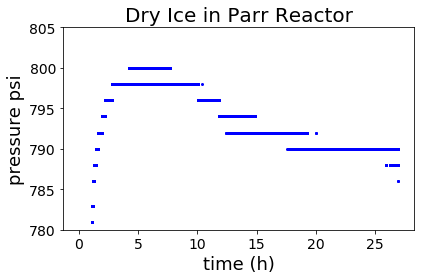

In [13]:
# plot of pressure over entire time
save_path = save_folder + save_prefix + '_p_full.pdf'
plot.plot_p_vs_t(p, t, save_plot=True, save_path=save_path, p_lim=[780, 805], t_units=t_units,
                 title=title)

## Compare to theory

We estimate that the maximum pressure is the pressure achieved when all the dry ice has sublimated. We compare this value to 

In [16]:
p_max = np.max(p)
print("Maximum pressure is {p_max} psi.".format(p_max=p_max))
# calculated using EoS at http://peacesoftware.de/einigewerte/co2_e.html
print("Predicted pressure based on CO2 equation of state is 766 psi.") 

Maximum pressure is 800.0 psi.
Predicted pressure based on CO2 equation of state is 766 psi.


## Discussion

In this case, the predicted pressure was *lower* than the measured pressure, whereas in the solubility experiment whose analysis was performed on April 22, 2019, the predicted pressure was *higher* than the measured pressure. This is particularly surprising since the pressures are in a similar range (600-700 psi vs. 700-800 psi).